# Exploratory Data Analysis Roadmap

This notebook will guide you through EDA step by step, even if you don't have a specific goal yet.

## 1. Get to Know Your Data

List all columns, types, and see a sample of your data.

In [5]:
import pandas as pd

df = pd.read_csv('../../data/cleaned/world_data_2023_cleaned.csv')

# List columns, types, and show a sample
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    195 non-null    object 
 1   density_p_km2                              195 non-null    int64  
 2   abbreviation                               195 non-null    object 
 3   agricultural_land_pct                      195 non-null    float64
 4   land_area_km2                              195 non-null    float64
 5   armed_forces_size                          195 non-null    float64
 6   birth_rate                                 195 non-null    float64
 7   calling_code                               195 non-null    float64
 8   capital_major_city                         195 non-null    object 
 9   co2_emissions                              195 non-null    float64
 10  cpi                       

,country,density_p_km2,abbreviation,agricultural_land_pct,land_area_km2,armed_forces_size,birth_rate,calling_code,capital_major_city,co2_emissions,...,out_of_pocket_health_expenditure,physicians_per_thousand,population,population:_labor_force_participation_pct,tax_revenue_pct,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,-1.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,-1.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,-1.0,-1.0,-1.0,-1.00,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,-1.00,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


## 2. Summarize and Visualize

See basic statistics and visualize distributions for numeric columns.

       density_p_km2  agricultural_land_pct  land_area_km2  armed_forces_size  \
count     195.000000             195.000000   1.950000e+02         195.000000   
mean      122.441026              37.677436   3.068843e+05       68799.825641   
std       136.713789              22.657611   4.633141e+05      113712.738962   
min        -1.000000              -1.000000  -1.000000e+00          -1.000000   
25%        25.000000              19.800000   1.300050e+04        2000.000000   
50%        76.000000              39.200000   9.302800e+04       19000.000000   
75%       151.500000              54.850000   3.987545e+05       74000.000000   
max       667.000000              82.600000   2.344858e+06      563000.000000   

       birth_rate  calling_code  co2_emissions          cpi  cpi_change_pct  \
count  195.000000    195.000000   1.950000e+02   195.000000      195.000000   
mean    17.423385    358.692308   1.714167e+05   173.769487        6.088718   
std     10.159580    323.440187  

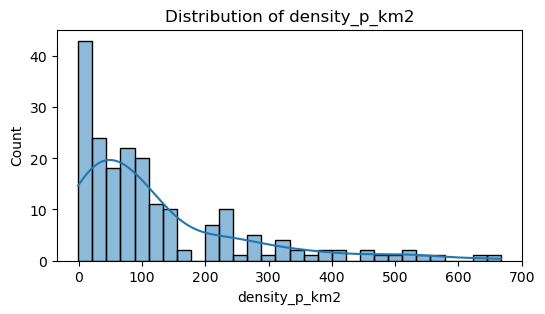

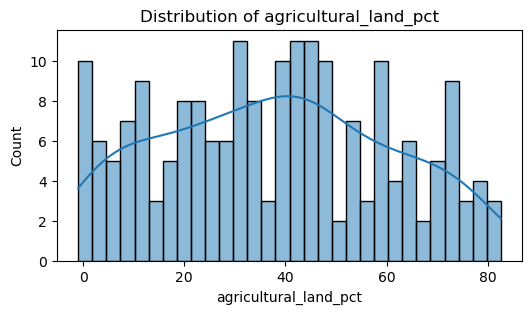

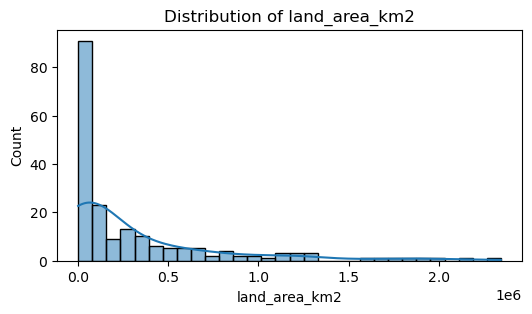

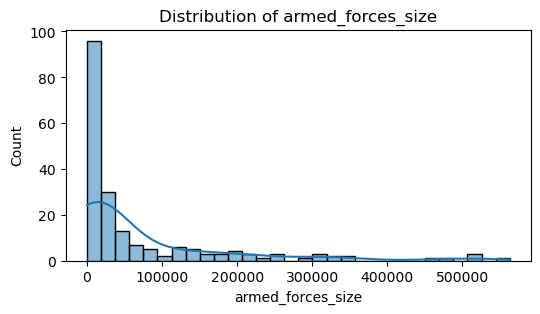

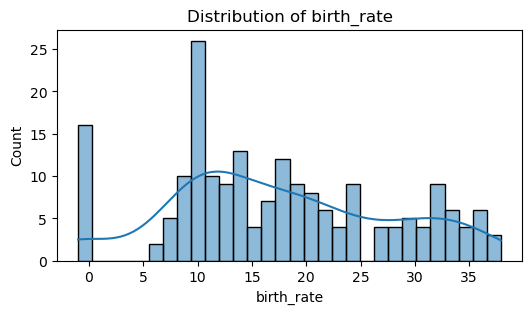

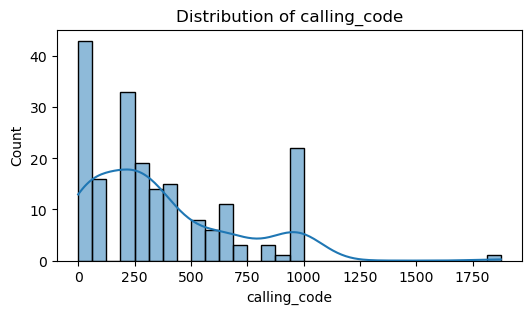

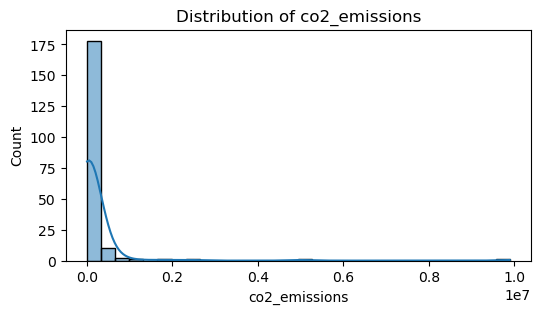

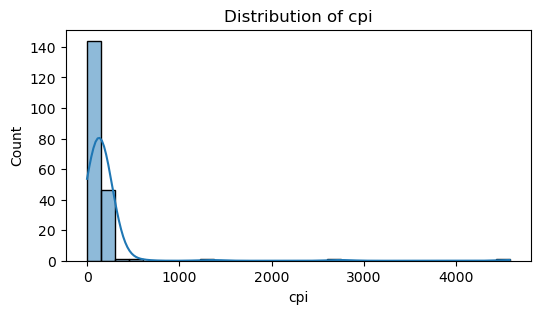

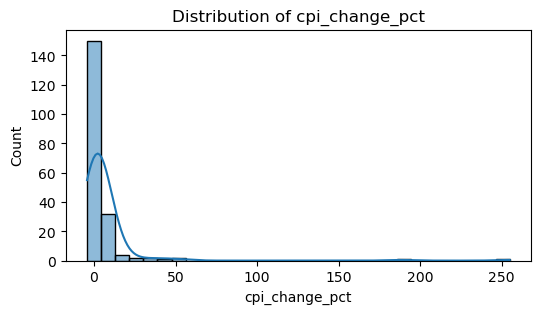

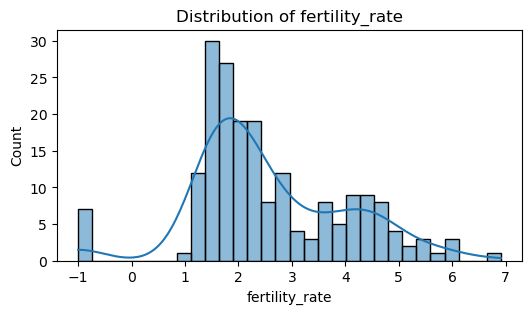

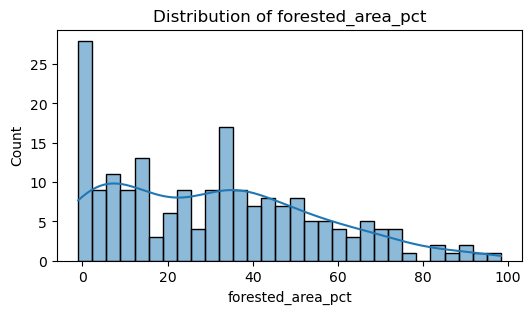

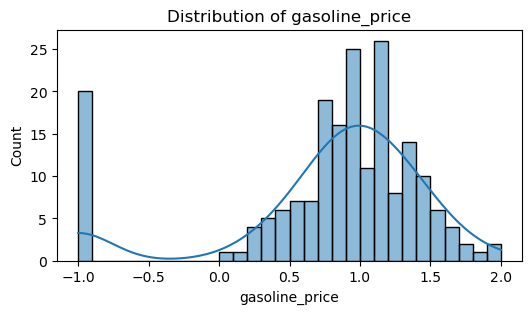

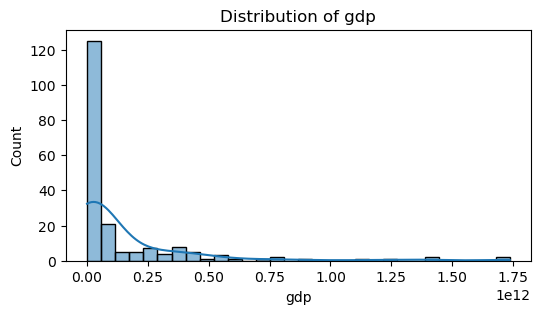

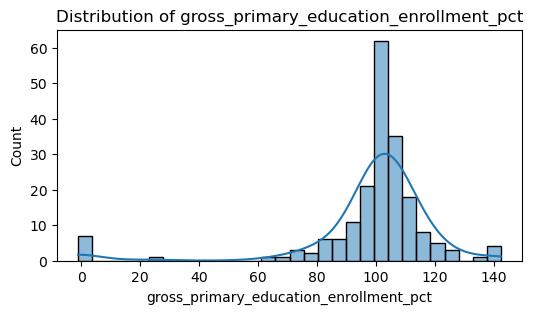

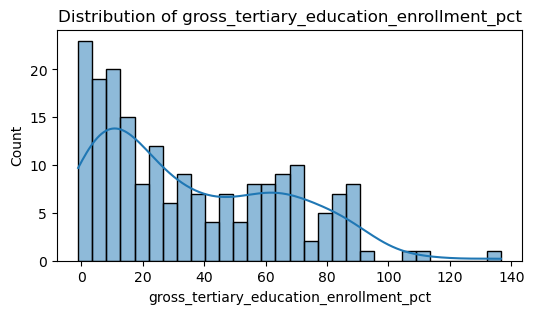

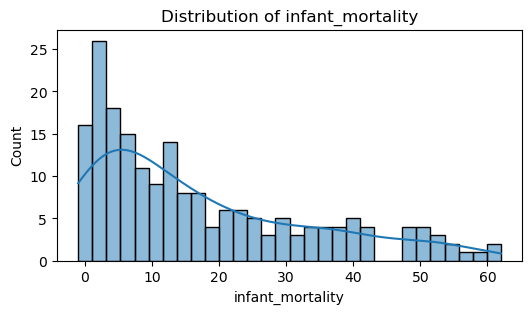

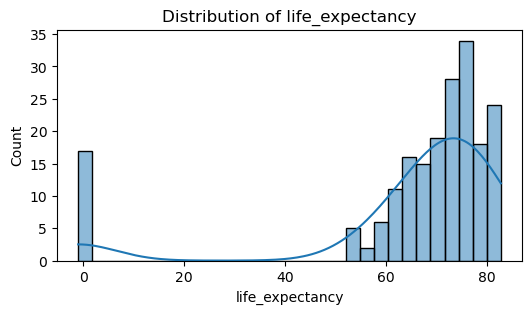

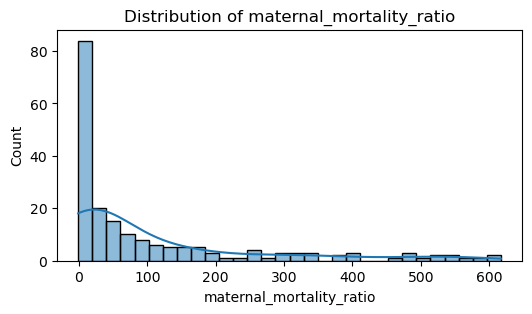

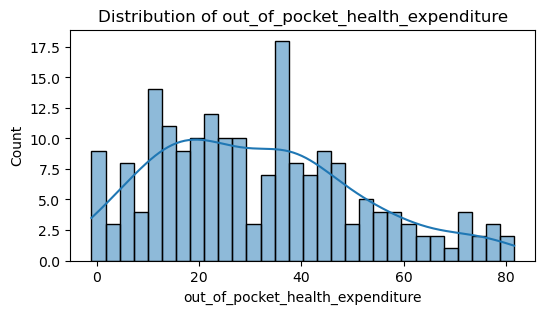

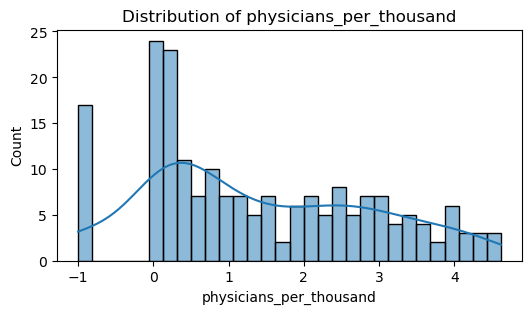

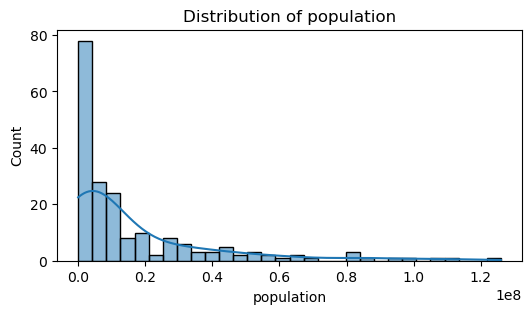

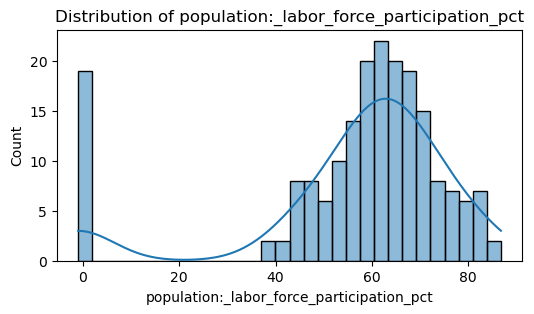

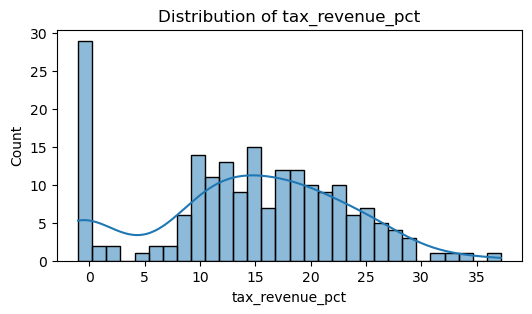

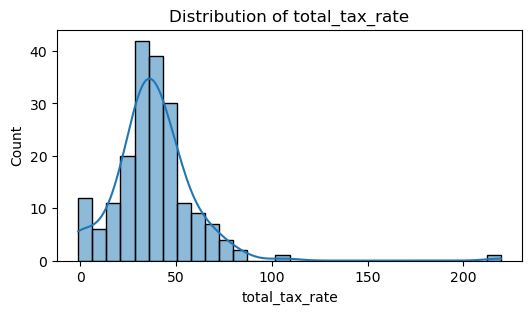

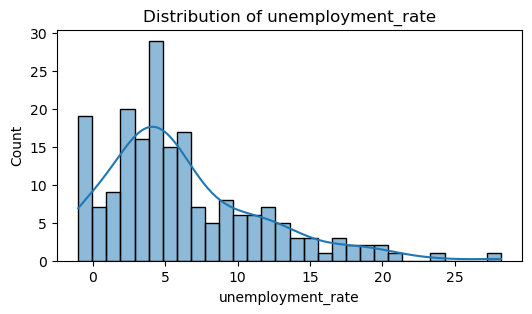

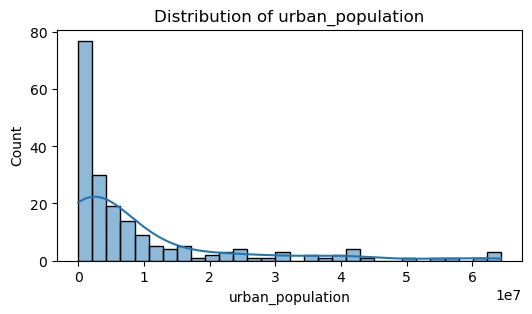

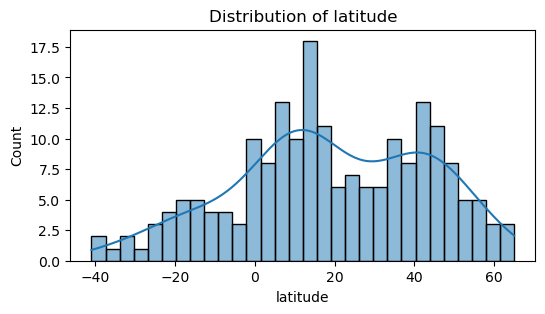

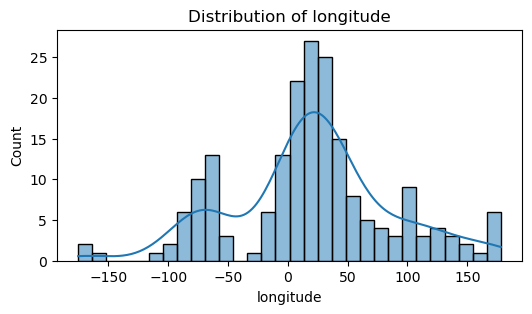

In [7]:
# Basic statistics for numeric columns
print(df.describe())

# Visualize distributions for a few numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:  # Show first 3 numeric columns
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 3. Explore Relationships

Check how columns relate to each other using correlation and scatter plots.

In [ ]:
# Correlation matrix for numeric columns
corr = df.corr()
print(corr)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for two columns (example: GDP vs Life Expectancy)
if 'gdp' in df.columns and 'life_expectancy' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df['gdp'], y=df['life_expectancy'])
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy')
    plt.title('GDP vs Life Expectancy')
    plt.show()

## 4. Feature Engineering

Create new columns and see if they reveal new patterns.

In [ ]:
# Example: GDP per capita
if 'gdp' in df.columns and 'population' in df.columns:
    df['gdp_per_capita'] = df['gdp'] / df['population']
    print(df[['gdp', 'population', 'gdp_per_capita']].head())

# Example: Log-transform GDP per capita
import numpy as np
if 'gdp_per_capita' in df.columns:
    df['log_gdp_per_capita'] = np.log1p(df['gdp_per_capita'].clip(lower=0))
    print(df[['gdp_per_capita', 'log_gdp_per_capita']].head())

## 5. Document Insights and Ask Questions

Write down what you notice, and practice asking questions about your data.

- Which columns have the most variation?
- Are there any surprising relationships?
- What would you want to predict or explain?
- What patterns do you see in the visualizations?

Keep notes here as you explore!